In [1]:
from PIL import Image
import numpy as np

In [2]:
### 

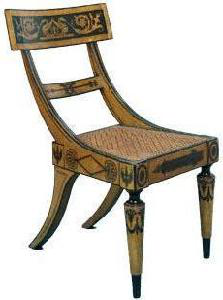

In [3]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0001.jpg")
img

In [4]:
# 배열 확인 (세로,가로,RGB)
np.array(img).shape

(300, 223, 3)

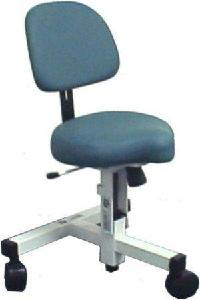

In [5]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0002.jpg")
img

In [6]:
# 배열 확인 (세로,가로,RGB)
np.array(img).shape

(300, 200, 3)

In [7]:
# 너비 해상도 구하기
np.array(img).shape[1]

200

---
## chair 전체이미지의 해상도 평균 구하기

In [8]:
import glob

In [9]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    #print(img.shape[1])
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [10]:
print("chair의 너비 평균 해상도 :", np.mean(widthRatio))
print("chair의 높이 평균 해상도 :", np.mean(heightRatio))

chair의 너비 평균 해상도 : 230.69354838709677
chair의 높이 평균 해상도 : 296.98387096774195


In [11]:
# 갯수 확인
len(widthRatio)

62

In [12]:
len(widthRatio) == len(heightRatio)

True

> 너비 : 231        
> 높이 : 297        

---
### Chair의 이미지 해상도 변경 및 Gray Scale로 적용하기

In [13]:
# Chair의 파일갯수(62개)와 laptop의 파일갯수(81개)를 60개로 맞추기
i = 0
for file in sorted(glob.glob('../Data/cnn/chair/*.jpg')):
    img = Image.open(file)
    imgResize = img.resize((231, 297), Image.LANCZOS)
    imgResize = imgResize.convert("L")      # Grauscale, 투명도가 있는 경우에는 LA
    imgResize.save("../Data/cnn/chairnew/img_%04d.jpg"%i, 'JPEG')
    i+=1
    if i>= 60:
        break

---
### Laptop의 이미지 해상도 변경 및 Grayscale로 적용하기

In [14]:
# Laptop의 파일갯수(62개)와 laptop의 파일갯수(81개)를 60개로 맞추기
i = 0
for file in sorted(glob.glob('../Data/cnn/laptop/*.jpg')):
    img = Image.open(file)
    imgResize = img.resize((231, 297), Image.LANCZOS)
    imgResize = imgResize.convert("L")      # Grauscale, 투명도가 있는 경우에는 LA
    imgResize.save("../Data/cnn/laptopnew/img_%04d.jpg" % i, 'JPEG')
    i += 1
    if i >= 60:
        break


---
# chair image를 numpy로 변경하기

In [15]:
number_of_data = 60
img_width_size = 231
img_height_size = 297

In [16]:
# 1차원데이터로 만든다. 
chairData = np.zeros(number_of_data*img_width_size*img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [17]:
chairData.shape

(60, 297, 231)

In [18]:
i = 0
for file in sorted(glob.glob('../Data/cnn/chairnew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i+=1

In [19]:
chairData.shape

(60, 297, 231)

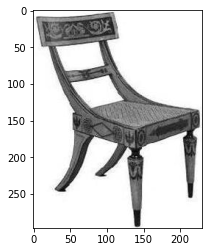

In [20]:
# 넣은 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(chairData[0].reshape(297, 231), cmap='gray')
plt.show()

---
### laptop image를 numpy로 변경하기

In [21]:
laptopData = np.zeros(number_of_data*img_width_size*img_height_size,
                      dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)


In [22]:
i = 0
for file in sorted(glob.glob('../Data/cnn/laptopnew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    laptopData[i,:,:] = img
    i+=1

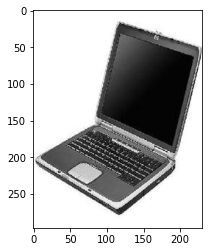

In [24]:
plt.imshow(laptopData[0].reshape(297,231), cmap="gray")
plt.show()

---
### numpy data를 train data로 합치기

In [26]:
train = np.concatenate([chairData, laptopData])
train.shape

(120, 297, 231)

In [27]:
### target data 만들기
target = np.concatenate([np.zeros(60), np.ones(60)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

---
### Train과 Target으로 나누기